In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

In [32]:
listOfImages = []
listOfImages = getListOfFiles("./data/raw/8547")

In [33]:
listOfImages

['./data/raw/8547\\0.jpg',
 './data/raw/8547\\1.jpg',
 './data/raw/8547\\10.jpg',
 './data/raw/8547\\11.jpg',
 './data/raw/8547\\12.jpg',
 './data/raw/8547\\13.jpg',
 './data/raw/8547\\14.jpg',
 './data/raw/8547\\15.jpg',
 './data/raw/8547\\16.jpg',
 './data/raw/8547\\17.jpg',
 './data/raw/8547\\18.jpg',
 './data/raw/8547\\19.jpg',
 './data/raw/8547\\2.jpg',
 './data/raw/8547\\20.jpg',
 './data/raw/8547\\21.jpg',
 './data/raw/8547\\22.jpg',
 './data/raw/8547\\23.jpg',
 './data/raw/8547\\24.jpg',
 './data/raw/8547\\25.jpg',
 './data/raw/8547\\26.jpg',
 './data/raw/8547\\3.jpg',
 './data/raw/8547\\4.jpg',
 './data/raw/8547\\5.jpg',
 './data/raw/8547\\6.jpg',
 './data/raw/8547\\7.jpg',
 './data/raw/8547\\8.jpg',
 './data/raw/8547\\9.jpg']

In [34]:
def segment_fp(images):
    segmented_images = []
    failed = []
    for i, image in enumerate(images):
        ret, thresh = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(64,64))
        img2 = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
        img2 = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel)
        nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img2, connectivity=4)
        try:
            max_label, max_size = max([(i, stats[i, cv2.CC_STAT_AREA]) for i in range(1, nb_components)], key=lambda x: x[1])
            img2 = np.ones(output.shape) * 255
            img2[output == max_label] = 0
        except:
            nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(image, connectivity=4)
            print('failed1')
            img2 = images[i]
        
        try:
            x,y,w,h = cv2.boundingRect(np.uint8(img2))
        except:
            failed.append((i, 'second'))
            print('failed2')
            segmented_images.append(images[i])
            continue
        segmented = image.copy()[y:y+h, x:x+w]
        if segmented.shape[0] == 0 or segmented.shape[1] == 0:
            failed.append((i, 'third'))
            print('failed3')
            segmented_images.append(images[i])
            continue
        segmented_images.append(img2)
    return np.array(segmented_images)

In [35]:
images = []
for image in listOfImages:
    img = cv2.imread(image, 0)
    images.append(img)

In [36]:
masks = segment_fp(images)

<ipython-input-34-82dabcceb00f>:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(segmented_images)


In [37]:
masks[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

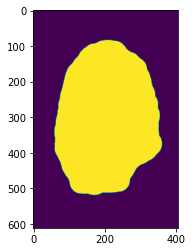

In [38]:
imgplot = plt.imshow(masks[3])

In [39]:
i = 0
for mask in masks:
    fileName = listOfImages[i]
    cv2.imwrite(fileName, mask)
    i=i+1

In [16]:
cv2.imwrite('trial.jpg', masks[0])

True

In [21]:
listOfImages

['./data\\raw\\8094\\0.jpg',
 './data\\raw\\8094\\1.jpg',
 './data\\raw\\8094\\10.jpg',
 './data\\raw\\8094\\11.jpg',
 './data\\raw\\8094\\12.jpg',
 './data\\raw\\8094\\13.jpg',
 './data\\raw\\8094\\14.jpg',
 './data\\raw\\8094\\15.jpg',
 './data\\raw\\8094\\16.jpg',
 './data\\raw\\8094\\17.jpg',
 './data\\raw\\8094\\18.jpg',
 './data\\raw\\8094\\19.jpg',
 './data\\raw\\8094\\2.jpg',
 './data\\raw\\8094\\20.jpg',
 './data\\raw\\8094\\21.jpg',
 './data\\raw\\8094\\22.jpg',
 './data\\raw\\8094\\23.jpg',
 './data\\raw\\8094\\24.jpg',
 './data\\raw\\8094\\25.jpg',
 './data\\raw\\8094\\26.jpg',
 './data\\raw\\8094\\27.jpg',
 './data\\raw\\8094\\28.jpg',
 './data\\raw\\8094\\29.jpg',
 './data\\raw\\8094\\3.jpg',
 './data\\raw\\8094\\30.jpg',
 './data\\raw\\8094\\31.jpg',
 './data\\raw\\8094\\32.jpg',
 './data\\raw\\8094\\33.jpg',
 './data\\raw\\8094\\34.jpg',
 './data\\raw\\8094\\35.jpg',
 './data\\raw\\8094\\36.jpg',
 './data\\raw\\8094\\37.jpg',
 './data\\raw\\8094\\38.jpg',
 './data\\raw\